In [1]:
pip install flask


   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/101.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 101.7/101.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   ---------------------------------------- 133.3/133.3 kB 2.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install opencv-python numpy matplotlib pygame 


   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.8 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.3/10.8 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.8 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.8 MB 5.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.8 MB 10.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.8 MB 18.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.8 MB 19.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.8 MB 18.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/10.8 MB 18.4 MB/s eta 0:00:01
   ----------------------------- ---------- 7.8/10.8 MB 17.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.8 MB 17.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.8 MB 17.2 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2
import numpy as np
import os

# Paths to YOLO files
cfg_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'

# Check if YOLO files exist
if not os.path.exists(cfg_path):
    print(f"Configuration file not found: {cfg_path}")
    exit()
if not os.path.exists(weights_path):
    print(f"Weights file not found: {weights_path}")
    exit()

# Initialize the YOLO model
try:
    net = cv2.dnn.readNet(weights_path, cfg_path)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    print("YOLO model loaded successfully.")
except Exception as e:
    print(f"Error loading YOLO model: {e}")
    exit()


YOLO model loaded successfully.


test run using the dog and something. can add images for other reference.

pygame 2.6.0 (SDL 2.28.4, Python 3.11.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
Playing audio for sports ball
Playing audio for person
Playing audio for baseball bat


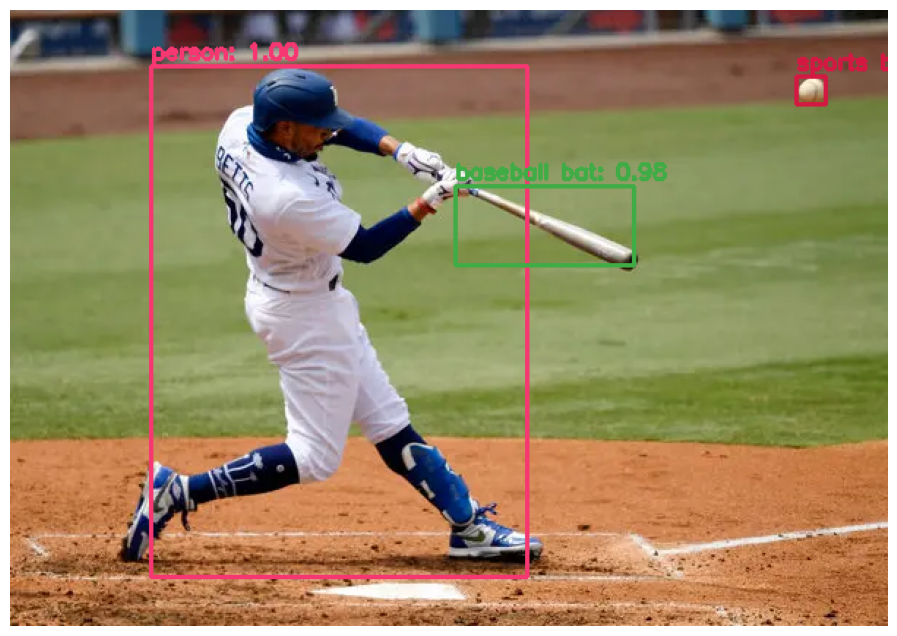

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pygame
import os
import time

# Initialize Pygame mixer
pygame.mixer.init()

# Function to play audio for a specific class
def play_audio(class_name):
    audio_path = f'audio/{class_name}.mp3'
    if os.path.exists(audio_path):
        print(f"Playing audio for {class_name}")
        pygame.mixer.music.load(audio_path)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():  # Wait until the audio finishes playing
            time.sleep(0.1)
    else:
        print(f"Audio file for {class_name} not found.")

# Paths to the files
weights_path = 'D:/for object detection/yolo-dataset/yolov3.weights'
config_path = 'D:/for object detection/yolo-dataset/yolov3.cfg'
names_path = 'D:/for object detection/yolo-dataset/coco.names'

# Load the class names
with open(names_path, 'r') as f:
    class_names = f.read().strip().split('\n')

# Load the YOLO model
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
layer_names = net.getLayerNames()

# Check the type of the output layers
output_layers_indices = net.getUnconnectedOutLayers()
if isinstance(output_layers_indices, np.ndarray):
    output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]
else:
    output_layers = [layer_names[i[0] - 1] for i in output_layers_indices]

# Function to perform object detection
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run the forward pass to get the outputs
    outputs = net.forward(output_layers)

    # Process the outputs
    boxes = []
    confidences = []
    class_ids = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    detected_classes = set()  # Track detected classes to play audio only once per frame

    # Draw the bounding boxes
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in np.random.randint(0, 255, size=3)]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            detected_classes.add(class_names[class_ids[i]])

    # Play audio for detected classes
    for class_name in detected_classes:
        play_audio(class_name)

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
detect_objects('D:/for object detection/yolo-dataset/testimages/besbal.png')


version 1: frame by frame output. the regular shiz

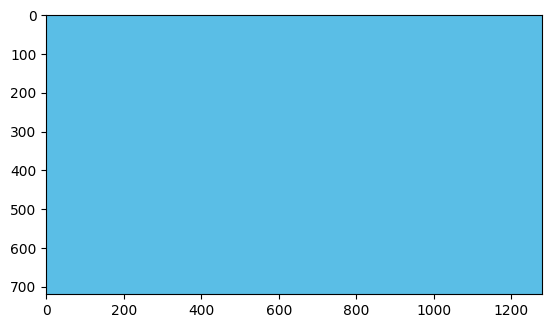

C:\Users\Admin\AppData\Local\Temp\ipykernel_16560\2124088263.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  if plt.waitforbuttonpress(0.01):


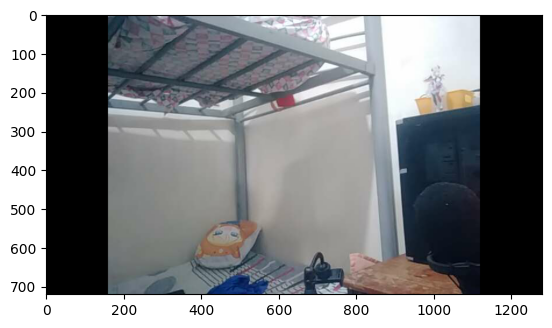

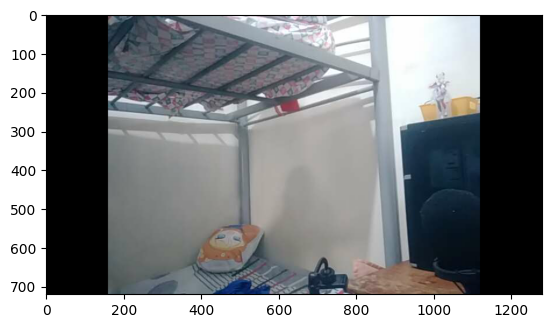

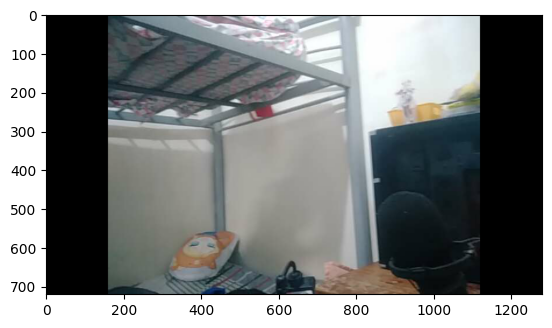

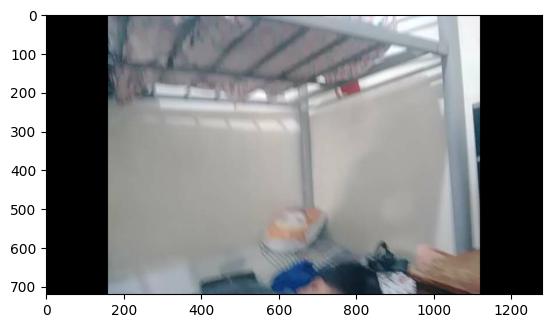

Playing audio for person


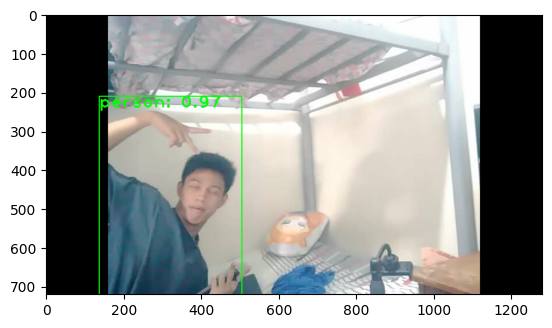

Playing audio for person


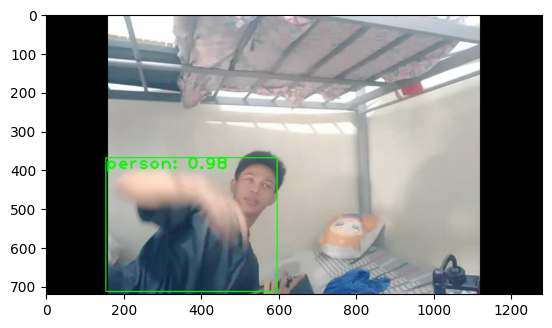

Playing audio for person


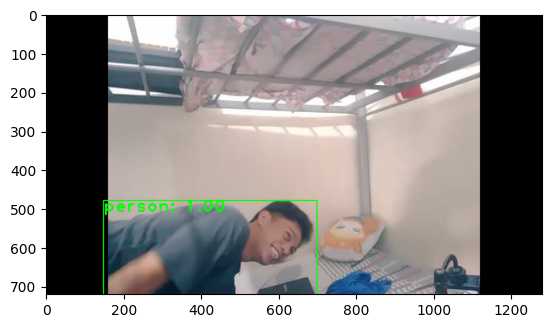

Playing audio for person


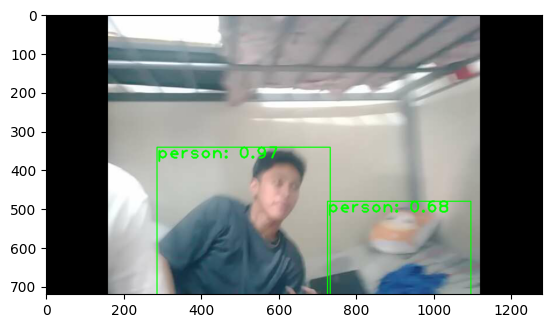

Playing audio for person


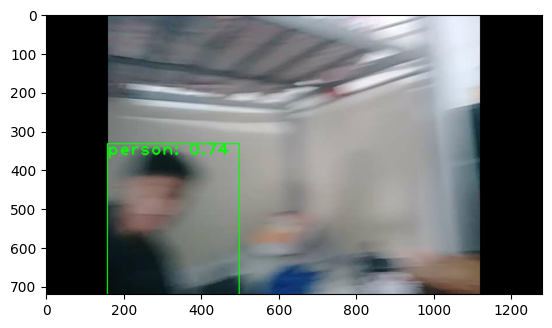

Playing audio for person


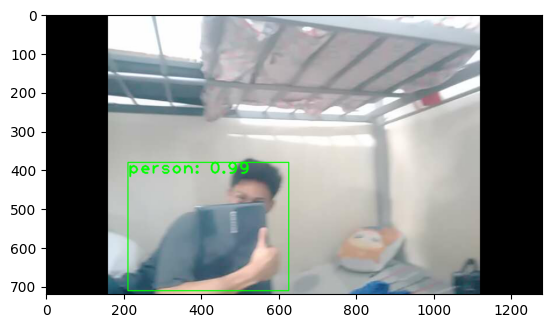

Playing audio for book
Playing audio for person


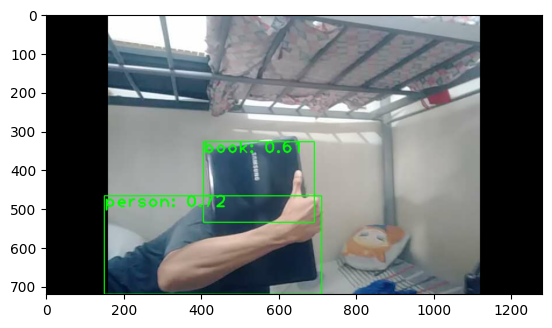

Playing audio for person


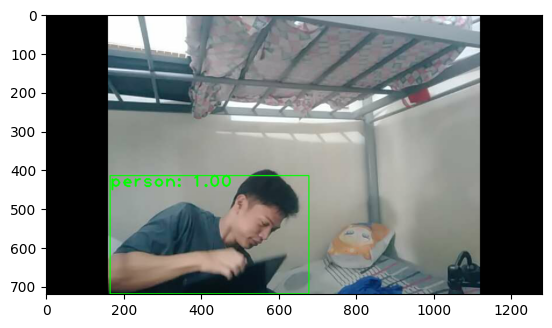

Playing audio for tvmonitor


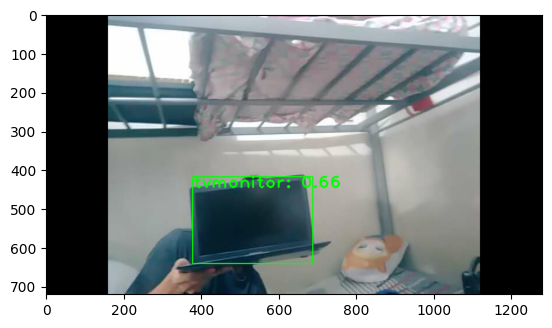

Playing audio for laptop


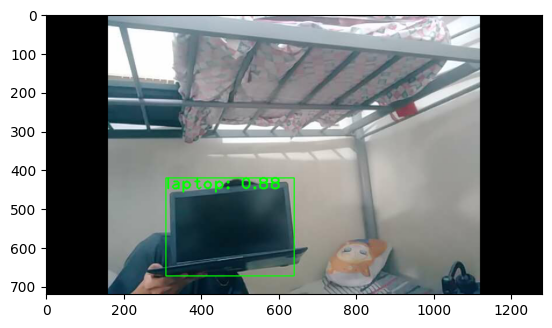

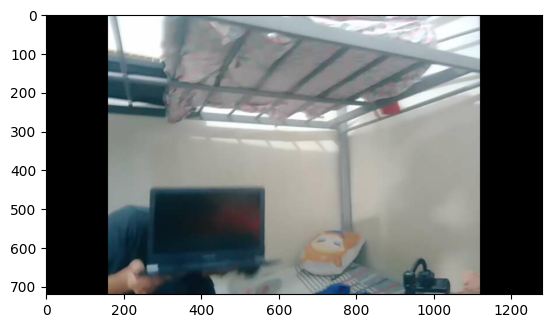

Playing audio for book
Playing audio for person


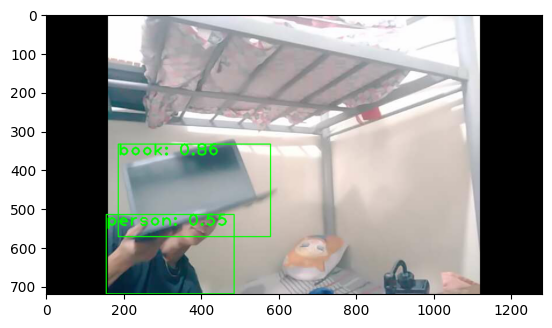

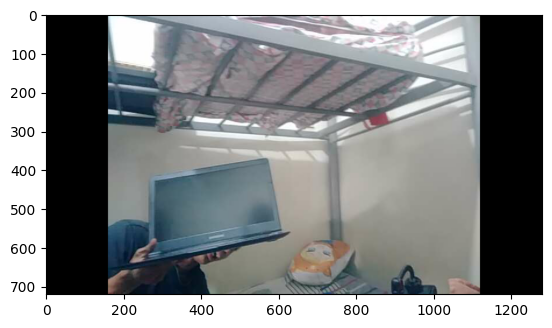

Playing audio for laptop


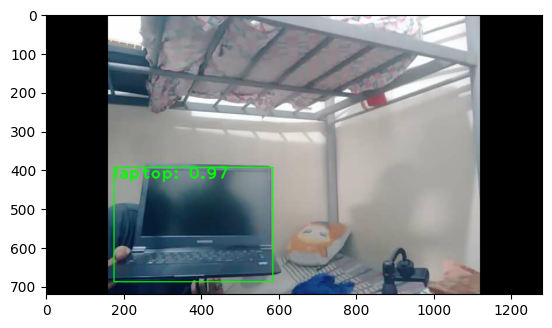

KeyboardInterrupt: 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pygame
import os
import time

# Initialize Pygame mixer
pygame.mixer.init()

# Function to play audio for a specific class
def play_audio(class_name):
    audio_path = f'audio/{class_name}.mp3'
    if os.path.exists(audio_path):
        print(f"Playing audio for {class_name}")
        pygame.mixer.music.load(audio_path)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():  # Wait until the audio finishes playing
            time.sleep(0.1)
    else:
        print(f"Audio file for {class_name} not found.")

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Get the names of all layers
layer_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

# Load COCO class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize the webcam (change the index if necessary to match DroidCam)
cap = cv2.VideoCapture(1)  # Change the index if DroidCam is not the default

plt.ion()  # Enable interactive mode

while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    detected_classes = set()  # Track detected classes to play audio only once per frame
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label}: {confidence:.2f}", (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)
            detected_classes.add(label)

    # Play audio for detected classes
    for class_name in detected_classes:
        play_audio(class_name)
    
    # Display the resulting frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.draw()
    plt.pause(0.001)

    # Add a delay to ensure audio playback is finished before capturing the next frame
    time.sleep(2)  # Adjust the delay as necessary

    # Break the loop on 'q' key press
    if plt.waitforbuttonpress(0.01):
        break

cap.release()
plt.close()


version 2 : real time where it shows gui and the real time detection. wip

In [ ]:
import cv2
import numpy as np

# Create a black image
image = np.zeros((512, 512, 3), np.uint8)

# Display the image in a window
cv2.imshow("Test Window", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np


# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Get the names of all layers
layer_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

# Load COCO class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize the webcam (change the index if necessary to match DroidCam)
cap = cv2.VideoCapture(1)  # Change the index if DroidCam is not the default

while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, color, 2)

    # Display the resulting frame
    cv2.imshow("Object Detection", frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Ver3: di ko mapagana tong v2 pakyu yan. anyways, use this 

In [ ]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
import pygame
import os
import time

app = Flask(__name__)

# Initialize Pygame mixer
pygame.mixer.init()

# Function to play audio for a specific class
def play_audio(class_name):
    audio_path = f'audio/{class_name}.mp3'
    if os.path.exists(audio_path):
        print(f"Playing audio for {class_name}")
        pygame.mixer.music.load(audio_path)
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy():  # Wait until the audio finishes playing
            time.sleep(0.1)
    else:
        print(f"Audio file for {class_name} not found.")

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Get the names of all layers
layer_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

# Load COCO class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Route to handle distance data from Arduino
@app.route('/detect', methods=['POST'])
def detect():
    data = request.get_json()
    distance1 = data.get('distance1')
    distance2 = data.get('distance2')
    distance3 = data.get('distance3')

    # Initialize the webcam (change the index if necessary to match DroidCam)
    cap = cv2.VideoCapture(1)  # Change the index if DroidCam is not the default
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        return jsonify({'error': 'Failed to capture image from camera'})

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    detected_classes = set()  # Track detected classes to play audio only once per frame
    for i in range(len(boxes)):
        if i in indexes:
            label = str(classes[class_ids[i]])
            detected_classes.add(label)

    # Determine action based on detected objects
    action = "straight"
    if "left_object" in detected_classes:
        action = "left"
    elif "right_object" in detected_classes:
        action = "right"

    # Play audio for detected classes
    for class_name in detected_classes:
        play_audio(class_name)

    return jsonify({'action': action, 'detected_classes': list(detected_classes)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
